# Soal 1. Pemahaman k-means clustering

Jelaskan bagaimana cara kerja k-means clustering!

Jawab disini:



K-means clustering bekerja dengan cara mengelompokkan data-data sesuai banyaknya k, pengelompokkan dilakukan dengan cara mengelompokkan data yang memiliki jarak terdekat dengan centroid yang dibangkitkan secara random sebanyak k.

---

---



---













---



Download disini [pelanggan.csv](https://drive.google.com/uc?export=download&id=1jX_rLPfcCfzEEgy9xaoALmpqfU2s5TTB)

In [9]:
import pandas as pd
df = pd.read_csv('pelanggan_supermarket.csv')
df.head()

,ID_pelanggan,Jenis Kelamin,Umur,Pendapatan pertahun (juta),Skor Belanja (1-100)
0,1,Laki-laki,19.0,15,39.0
1,2,Laki-laki,21.0,15,81.0
2,3,Perempuan,20.0,16,6.0
3,4,Perempuan,23.0,16,77.0
4,5,Perempuan,31.0,17,40.0


# Soal 2. Clustering data menggunakan k-means clustering

Dalam soal ini, kalian diminta untuk melakukan clustering antara data Umur dan Skor Belanja(1-100). Namun, clustering tidak bisa dilakukan karena data memiliki outlier dan missing value. Maka, lakukanlah tahapan-tahapan berikut:

*   Handling missing value dengan menggunakan method ='ffill'
*   Handling outlier menggunakan metode Interquartile range
*   Lakukan rescaling data menggunakan StandardScaler
*   Lakukan clustering menggunakan kmeans clustering dengan k =2, dan visualisasikan.. 
*   Gunakan Elbow method untuk menemukan jumlah k kluster yang tepat
*   Gunakan k=3 (rekomendasi methode Elbow) lalu visualisasikan
*   Hitung silhoutte Coefficient dari ke dua hasil prediksi klustering tersebut










In [10]:
#code here
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Cek missing value
df.isnull().sum()


ID_pelanggan                  0
Jenis Kelamin                 0
Umur                          5
Pendapatan pertahun (juta)    0
Skor Belanja (1-100)          4
dtype: int64

In [11]:
# Handling missing value dengan menggunakan method ='ffill'
df.fillna(method='ffill',inplace=True)

In [12]:
# Cek missing value lagi
df.isnull().sum()

ID_pelanggan                  0
Jenis Kelamin                 0
Umur                          0
Pendapatan pertahun (juta)    0
Skor Belanja (1-100)          0
dtype: int64

In [13]:
#Fungsi untuk mencari nilai outliers

def get_lower_upper_bound(x):
    q1 = np.percentile(x,25)
    q3 = np.percentile(x,75)
    q2 = q3 - q1
    Lb = q1 - (q2 * 1.5)
    Ub = q3 + (q2 * 1.5)
    return Lb, Ub

def get_outliers(x):
    lower_bound, upper_bound = get_lower_upper_bound(x)
    return x[np.where((x > upper_bound) | (x < lower_bound))]

print(get_outliers(df['Skor Belanja (1-100)'].values))
print(get_outliers(df['Umur'].values))

[150.]
[120.]


In [17]:
#handling outlier menggunakan method IQR

def remove_outliers_iqr(df):
    q1 = df.quantile(0.25)
    q3 = df.quantile(0.75)
    iqr = q3 - q1
    Lb = q1 - (iqr * 1.5)
    Ub = q3 + (iqr * 1.5)
    df_final = df[~((df<Lb) | (df>Ub))]
    return df_final

In [18]:
removed_outliers = remove_outliers_iqr(df[['Umur','Skor Belanja (1-100)']])
removed_outliers

,Umur,Skor Belanja (1-100)
0,19.0,39.0
1,21.0,81.0
2,20.0,6.0
3,23.0,77.0
4,31.0,40.0
...,...,...
245,59.0,14.0
246,35.0,90.0
247,37.0,32.0
248,32.0,86.0


In [24]:
#cek missing value dari dataset removed_outliers

removed_outliers.isnull().sum()

Umur                    1
Skor Belanja (1-100)    1
dtype: int64

In [25]:
#drop missing value dari dataset removed_outliers

removed_outliers.dropna(axis=0,inplace=True)

In [26]:
#cek missing value dari dataset removed_outliers lagi

removed_outliers.isnull().sum()

Umur                    0
Skor Belanja (1-100)    0
dtype: int64

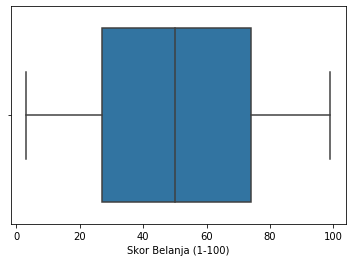

In [28]:
#Cek Outliers dari dataset removed_outliers lagi
import seaborn as sns

sns.boxplot(x=removed_outliers['Skor Belanja (1-100)'])

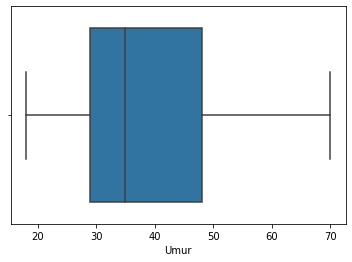

In [29]:
sns.boxplot(x=removed_outliers['Umur'])

In [31]:
#Scalling data menggunakan StandardScaler untuk data set removed_outliers

sc = StandardScaler()
df_scalling = sc.fit_transform(removed_outliers)

In [33]:
#cek dataset baru yang telah di scalling

df_baru_scaling = pd.DataFrame(data=df_scalling,columns=['Umur','Skor Belanja (1-100)'])
df_baru_scaling

,Umur,Skor Belanja (1-100)
0,-1.455005,-0.396407
1,-1.304215,1.119369
2,-1.379610,-1.587373
3,-1.153425,0.975009
4,-0.550263,-0.360317
...,...,...
243,-0.851844,0.686290
244,1.560802,-1.298654
245,-0.248682,1.444178
246,-0.097892,-0.649036


In [39]:
#mulai clustering menggunakan Kmeans

kmeans1 = KMeans(n_clusters=2,random_state=42).fit(df_scalling)
labels1 = kmeans1.labels_

In [40]:
df_with_labels = pd.DataFrame(data=df_scalling,columns=['Umur','Skor Belanja (1-100)'])
df_with_labels['Labels_kmeans1'] = labels1

In [41]:
df_with_labels

,Umur,Skor Belanja (1-100),Labels_kmeans1
0,-1.455005,-0.396407,0
1,-1.304215,1.119369,0
2,-1.379610,-1.587373,1
3,-1.153425,0.975009,0
4,-0.550263,-0.360317,0
...,...,...,...
243,-0.851844,0.686290,0
244,1.560802,-1.298654,1
245,-0.248682,1.444178,0
246,-0.097892,-0.649036,1


n_cluster = 2


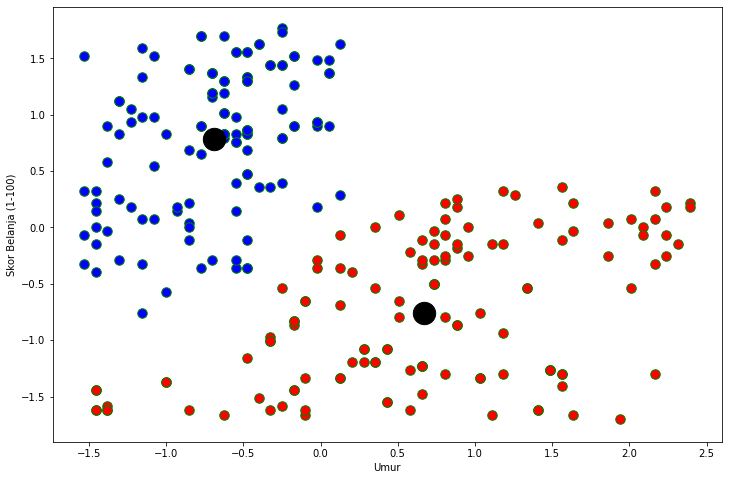

In [60]:
#visualisasi hasil clustering

print('n_cluster = 2')
fig1, ax1 = plt.subplots(figsize=(12,8))
ax1.scatter(df_with_labels['Umur'][df_with_labels.Labels_kmeans1 == 0],
            df_with_labels['Skor Belanja (1-100)'][df_with_labels.Labels_kmeans1 == 0],
           c='b',s=90,edgecolor='green')
ax1.scatter(df_with_labels['Umur'][df_with_labels.Labels_kmeans1 == 1],
            df_with_labels['Skor Belanja (1-100)'][df_with_labels.Labels_kmeans1 == 1],
           c='r',s=90,edgecolor='green')
ax1.set_xlabel('Umur')
ax1.set_ylabel('Skor Belanja (1-100)')

centers = kmeans1.cluster_centers_
ax1.scatter(centers[:,0],centers[:,1],c='black',s=500)
plt.show()

D:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:882: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  f"KMeans is known to have a memory leak on Windows "


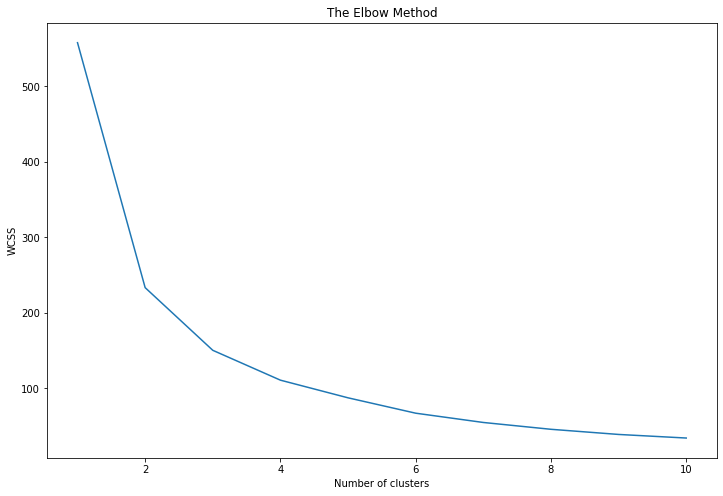

In [62]:
#menemukan jumlah k yang tepat menggunakan elbow graph

wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i,init='k-means++',random_state=42)
    kmeans.fit(df_with_labels)
    wcss.append(kmeans.inertia_)
    
fig2, ax2 = plt.subplots(figsize=(12,8))
ax2.plot(range(1,11),wcss)
ax2.set_xlabel('Number of clusters')
ax2.set_ylabel('WCSS')
ax2.set_title('The Elbow Method')
plt.show()

In [63]:
#percobaan K-means menggunakan number of clusters = 3

kmeans2 = KMeans(n_clusters=3,random_state=42).fit(df_scalling)
labels2 = kmeans2.labels_

In [64]:
df_with_labels['Labels_kmeans2'] = labels2

In [65]:
df_with_labels

,Umur,Skor Belanja (1-100),Labels_kmeans1,Labels_kmeans2
0,-1.455005,-0.396407,0,0
1,-1.304215,1.119369,0,2
2,-1.379610,-1.587373,1,0
3,-1.153425,0.975009,0,2
4,-0.550263,-0.360317,0,0
...,...,...,...,...
243,-0.851844,0.686290,0,2
244,1.560802,-1.298654,1,1
245,-0.248682,1.444178,0,2
246,-0.097892,-0.649036,1,0


n_cluster = 3


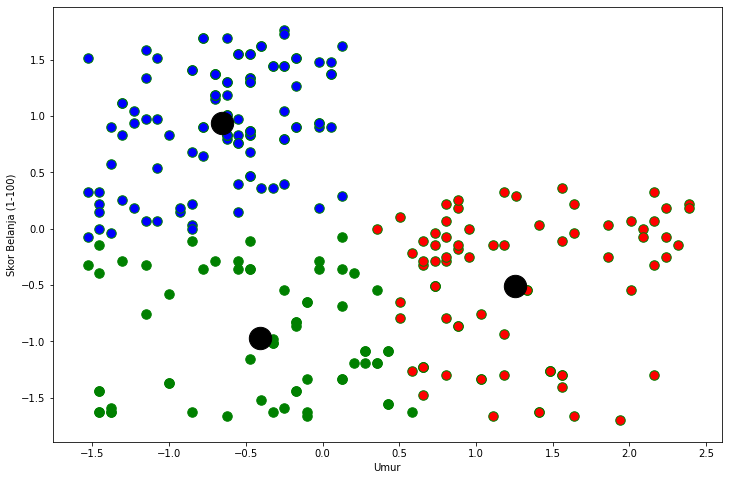

In [67]:
#visualisasi data hasil cluster dengan number of clusters = 3

print('n_cluster = 3')
fig3, ax3 = plt.subplots(figsize=(12,8))
ax3.scatter(df_with_labels['Umur'][df_with_labels.Labels_kmeans2 == 0],
            df_with_labels['Skor Belanja (1-100)'][df_with_labels.Labels_kmeans2 == 0],
           c='green',s=90,edgecolor='green')
ax3.scatter(df_with_labels['Umur'][df_with_labels.Labels_kmeans2 == 1],
            df_with_labels['Skor Belanja (1-100)'][df_with_labels.Labels_kmeans2 == 1],
           c='r',s=90,edgecolor='green')
ax3.scatter(df_with_labels['Umur'][df_with_labels.Labels_kmeans2 == 2],
            df_with_labels['Skor Belanja (1-100)'][df_with_labels.Labels_kmeans2 == 2],
           c='b',s=90,edgecolor='green')
ax3.set_xlabel('Umur')
ax3.set_ylabel('Skor Belanja (1-100)')

centers2 = kmeans2.cluster_centers_
ax3.scatter(centers2[:,0],centers2[:,1],c='black',s=500)
plt.show()

Expected output:

n_cluster =2

![](https://drive.google.com/uc?id=1RHedPeGR48w-cWl7WWkIsHTSB2DRgynO)


Elbow graph

![](https://drive.google.com/uc?id=1S3_uvQWzJCi8YwSBbpu2imKbUBZ3JdmV)

n_cluster =3

![](https://drive.google.com/uc?id=1EVMDQgPpC8vYpfxilyiJMRDNIr-JXULd)



---



---



---



# Soal 3. Analisa Data Hasil Clustering

Dari hasil klustering diatas, buatlah sebuah analisa segmentasi pelanggan untuk kemajuan supermarket. 

Jawab disini: dari hasil klustering dengan menggunakan 3 jenis kluster, kita dapat melihat 3 jenis golongan skor belanja yang diberikan oleh pelanggan di supermarket. golongan yang pertama adalah pelanggan dengan usia muda yang memberikan skor belanja yang rendah, golongan ini diberi warna hijau. lalu ada golongan kedua yaitu pelanggan dengan usia muda yang memberikan skor belanja yang tinggi, golongan ini diberi warna biru. lalu golongan yang terakhir yaitu pelanggan dengan usia tua yang memberikan skor belanja rendah.